In [1]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit']=1000
import glob

sys.path.append("../../src")
from visualize import vals_anime, imgs_anime, bars_anime

from helpers import get_delta_fo_ho, skip_BN_params, \
                    plot_loss, plot_dloss, plot_fh

In [2]:
plt.rcParams["font.size"] = 18

### An example of visualization

In [3]:
def vis_BH_bar_loss(fname, nframes=2000, title=None):
    
    fig, ax = plt.subplots(1, 3, figsize=(20,8))
    ticks = ["","Conv1","Conv2","Conv3","Conv4","Linear"]

    animes = []
    
    with open(fname,'rb') as f:
        stat = pickle.load(f)
    lr = stat["lr"]
    bn = fname.split("_")[-1].split(".")[0]
    BH = skip_BN_params(stat["H"], bn)
    delta = get_delta_fo_ho(stat, bn_code=bn, BH=BH)
    loss = stat["loss"]
    animes.append(imgs_anime(BH, ax[1], ticks=ticks))
    animes.append(bars_anime(delta, ax[0], fix_range=False, ticks=ticks, ylabel="First/Higher Order Effect"))
    animes.append(vals_anime(loss, ax[2], xlabel="Iteration", ylabel="Loss"))

    def init():
        for anime in animes:
            anime.init()
        fig.suptitle(f"[{title}] i=0")
        return

    def update(i):
        #t = i*valfreq
        for anime in animes:
            anime.update(i)        
        fig.suptitle(f"[{title}] i={i}")
        return

    ani = FuncAnimation(fig, update, init_func=init, frames=nframes,
                        interval=50)
    #ani = ani.to_jshtml()
    #ani = ani.to_html5_video()
    plt.close()
    return ani


### Run

In [4]:
%%time
fname = "stat_lr1e-02_nl5_hid016_bn0000.pkl"
fullname = f"width/data0000/{fname}"
ani_bh = vis_BH_bar_loss(fullname, nframes=200, title="Batch Norm")
#ani_bh.save(f'anime_st2_bar/{fname.split(".")[0]}_slow_rangefixed.mp4', writer='ffmpeg', fps=50)

CPU times: user 4.76 s, sys: 500 ms, total: 5.26 s
Wall time: 5.3 s


In [5]:
HTML(ani_bh.to_html5_video())

### Make some plots

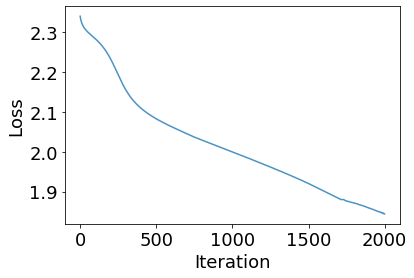

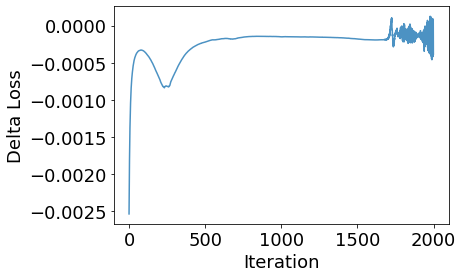

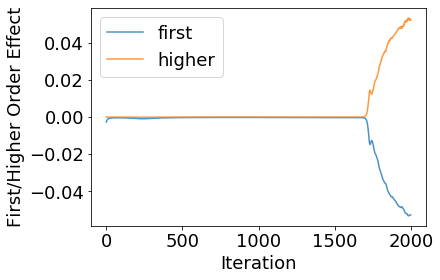

In [6]:
fig_l = plot_loss(fullname, nframes=2000)
fig_dl = plot_dloss(fullname, nframes=2000)
fig_fh = plot_fh(fullname, nframes=2000)